#Text Classification - Ted Talks Dataset

<img src="https://09c449efca3bbeb52dcea716-ddjaey2ypcfdo.netdna-ssl.com/wp-content/uploads/2017/03/TED.gif">

Text Classification is the process of assigning tags or categories to text according to its content.

In this workshop we will categorise a Ted Talk video based on the YouTube description.



## Getting started

To get started we need to import the following libraries:

- Numpy
- Pandas 
- Sklearn 

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from __future__ import print_function

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer, TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

from imblearn.over_sampling import RandomOverSampler

## Load and Clean the Data

Load our data into a dataframe (df) and clean the df so we are left with only what is needed.

To Do:

1. Load the data into a pandas dataframe
2. Create a dataframe with only `title`, `description`, and `categories` columns
3. Add another column called `cat_id` which is a numerically encoded version of the  `categories` column

In [3]:
#load the ted_metadata_youtube.csv into a dataframe
url = "https://ai-camp-content.s3.amazonaws.com/ted_metadata_youtube.csv"
df = pd.read_csv(url)

#Print the dataframes shape
df.shape

#Display the first 5 rows of the dataframe
df.head()

,Unnamed: 0,webpage_url,view_count,uploader_id,title,tags,categories,id,fulltitle,duration,description,dislike_count,like_count,average_rating,fulltitle_compare
0,0,https://www.youtube.com/watch?v=Jc2F3-nawnI,20695,TEDtalksDirector,Inge Missmahl brings peace to the minds of Afg...,"['Inge', 'Missmahl', 'TEDTalks', 'TED', 'talks...",['Nonprofits & Activism'],Jc2F3-nawnI,Inge Missmahl brings peace to the minds of Afg...,830,http://www.ted.com When German psychologist In...,14.0,193.0,4.729469,"['inge', 'missmahl', 'brings', 'peace', 'mind'..."
1,0,https://www.youtube.com/watch?v=IDkSDPgrtjs,129968,TEDtalksDirector,Edith Widder: The weird and wonderful world of...,"['Edith', 'Widder', 'TEDTalks', 'TED', 'talks'...",['Science & Technology'],IDkSDPgrtjs,Edith Widder: The weird and wonderful world of...,766,"http://www.ted.com In the deep, dark ocean, ma...",17.0,1155.0,4.941979,"['edith', 'widder', 'weird', 'wonderful', 'wor..."
2,0,https://www.youtube.com/watch?v=oD06XPtmLZY,46844,TEDtalksDirector,Jacqueline Novogratz on an escape from poverty,"['Jacqueline', 'Novogratz', 'TEDTalks', 'TED',...",['Nonprofits & Activism'],oD06XPtmLZY,Jacqueline Novogratz on an escape from poverty,451,http://www.ted.com Jacqueline Novogratz tells ...,42.0,325.0,4.542234,"['jacqueline', 'novogratz', 'escape', 'poverty']"
3,0,https://www.youtube.com/watch?v=NWUFjb8w9Ps,281435,TEDtalksDirector,Math class needs a makeover | Dan Meyer,"['Dan', 'Meyer', 'TEDTalks', 'TED', 'talks', '...",['Science & Technology'],NWUFjb8w9Ps,Math class needs a makeover | Dan Meyer,948,http://www.ted.com Today's math curriculum is ...,47.0,3019.0,4.938683,"['math', 'class', 'need', 'makeover', 'dan', '..."
4,0,https://www.youtube.com/watch?v=QHIocNOHd7A,192313,TEDtalksDirector,"Craig Venter unveils ""synthetic life""","['TEDTalks', 'TED', 'talks', 'Craig Venter', '...",['Science & Technology'],QHIocNOHd7A,"Craig Venter unveils ""synthetic life""",1098,http://www.ted.com Craig Venter and team make ...,106.0,2468.0,4.835276,"['craig', 'venter', 'unveils', 'synthetic', 'l..."


In [4]:
#The only columns we will require are title, description and categories
needed_columns = df[['title', 'description', 'categories']]

needed_columns.head()

,title,description,categories
0,Inge Missmahl brings peace to the minds of Afg...,http://www.ted.com When German psychologist In...,['Nonprofits & Activism']
1,Edith Widder: The weird and wonderful world of...,"http://www.ted.com In the deep, dark ocean, ma...",['Science & Technology']
2,Jacqueline Novogratz on an escape from poverty,http://www.ted.com Jacqueline Novogratz tells ...,['Nonprofits & Activism']
3,Math class needs a makeover | Dan Meyer,http://www.ted.com Today's math curriculum is ...,['Science & Technology']
4,"Craig Venter unveils ""synthetic life""",http://www.ted.com Craig Venter and team make ...,['Science & Technology']


In [5]:
print(needed_columns['categories'].values)

cat_id = pd.factorize(needed_columns['categories'])
needed_columns['cat_id'] = cat_id[0]
needed_columns.head(10)

["['Nonprofits & Activism']" "['Science & Technology']"
 "['Nonprofits & Activism']" ... "['Nonprofits & Activism']"
 "['Science & Technology']" "['Education']"]


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


,title,description,categories,cat_id
0,Inge Missmahl brings peace to the minds of Afg...,http://www.ted.com When German psychologist In...,['Nonprofits & Activism'],0
1,Edith Widder: The weird and wonderful world of...,"http://www.ted.com In the deep, dark ocean, ma...",['Science & Technology'],1
2,Jacqueline Novogratz on an escape from poverty,http://www.ted.com Jacqueline Novogratz tells ...,['Nonprofits & Activism'],0
3,Math class needs a makeover | Dan Meyer,http://www.ted.com Today's math curriculum is ...,['Science & Technology'],1
4,"Craig Venter unveils ""synthetic life""",http://www.ted.com Craig Venter and team make ...,['Science & Technology'],1
5,Danielle de Niese: A flirtatious aria,http://www.ted.com Can opera be ever-so-slight...,['Music'],2
6,Philip Howard: Four ways to fix a broken legal...,http://www.ted.com The land of the free has be...,['Nonprofits & Activism'],0
7,Why you should define your fears instead of yo...,"The hard choices -- what we most fear doing, a...",['People & Blogs'],3
8,Dennis vanEngelsdorp: Where have the bees gone?,http://www.ted.com Bees are dying in droves. W...,['Pets & Animals'],4
9,Close-up card magic with a twist | Lennart Green,http://www.ted.com Like your uncle at a family...,['Entertainment'],5


## Challenge 1

The categories values are stored as objects and all have brackets and apostrophes at the beginning and end.  Clean the data further by removing these and converting the values to type string.

***Note***: This step is not necissary for the completion of this machine learning task, it is just good practice!

In [6]:
# Convert values in categories to a strings
needed_columns['categories'] = needed_columns['categories'].astype(dtype=str)
needed_columns['categories'].dtype

import re 
pattern = '[^a-zA-Z\s\.\&]+'
needed_columns['categories'] = needed_columns['categories'].apply(lambda x: re.sub(pattern, ' ', x))

needed_columns.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,title,description,categories,cat_id
0,Inge Missmahl brings peace to the minds of Afg...,http://www.ted.com When German psychologist In...,Nonprofits & Activism,0
1,Edith Widder: The weird and wonderful world of...,"http://www.ted.com In the deep, dark ocean, ma...",Science & Technology,1
2,Jacqueline Novogratz on an escape from poverty,http://www.ted.com Jacqueline Novogratz tells ...,Nonprofits & Activism,0
3,Math class needs a makeover | Dan Meyer,http://www.ted.com Today's math curriculum is ...,Science & Technology,1
4,"Craig Venter unveils ""synthetic life""",http://www.ted.com Craig Venter and team make ...,Science & Technology,1


We may need to use a numerically encoded label instead of the string we have just cleaned.  Add another column to the dataframe called `cat_id` which is the `categories` column encoded.

***Hint***: If you are not sure, try the panda's [factorize](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.factorize.html) function

***Note***: Some machine learning models may not need this step because they can accept categorical string labels 

In [7]:
needed_columns.head(25)

,title,description,categories,cat_id
0,Inge Missmahl brings peace to the minds of Afg...,http://www.ted.com When German psychologist In...,Nonprofits & Activism,0
1,Edith Widder: The weird and wonderful world of...,"http://www.ted.com In the deep, dark ocean, ma...",Science & Technology,1
2,Jacqueline Novogratz on an escape from poverty,http://www.ted.com Jacqueline Novogratz tells ...,Nonprofits & Activism,0
3,Math class needs a makeover | Dan Meyer,http://www.ted.com Today's math curriculum is ...,Science & Technology,1
4,"Craig Venter unveils ""synthetic life""",http://www.ted.com Craig Venter and team make ...,Science & Technology,1
5,Danielle de Niese: A flirtatious aria,http://www.ted.com Can opera be ever-so-slight...,Music,2
6,Philip Howard: Four ways to fix a broken legal...,http://www.ted.com The land of the free has be...,Nonprofits & Activism,0
7,Why you should define your fears instead of yo...,"The hard choices -- what we most fear doing, a...",People & Blogs,3
8,Dennis vanEngelsdorp: Where have the bees gone?,http://www.ted.com Bees are dying in droves. W...,Pets & Animals,4
9,Close-up card magic with a twist | Lennart Green,http://www.ted.com Like your uncle at a family...,Entertainment,5


## Analyse the Data

Now we are going to look at the data that we have left and see if there is any further processing we can do.  Specifically, we are going to look at how many of each class we have.

###TODO:

- List all the categories and the number of ted talks that category has in the dataset
- Plot these counts in a histogram

In [8]:
# List the categories with their respective observation frequency
count = needed_columns['categories'].value_counts()
count

 Science & Technology      1110
 People & Blogs             390
 Nonprofits & Activism      270
 News & Politics            202
 Entertainment              153
 Education                  111
 Music                       76
 Howto & Style               54
 Pets & Animals              33
 Travel & Events             24
 Film & Animation            19
 Sports                      15
 Comedy                      14
 Autos & Vehicles            12
 Gaming                       9
Name: categories, dtype: int64

[Text(0, 0, ' Nonprofits & Activism '),
 Text(0, 0, ' Science & Technology '),
 Text(0, 0, ' Nonprofits & Activism '),
 Text(0, 0, ' Science & Technology '),
 Text(0, 0, ' Science & Technology '),
 Text(0, 0, ' Music '),
 Text(0, 0, ' Nonprofits & Activism '),
 Text(0, 0, ' People & Blogs '),
 Text(0, 0, ' Pets & Animals '),
 Text(0, 0, ' Entertainment '),
 Text(0, 0, ' Science & Technology '),
 Text(0, 0, ' Education '),
 Text(0, 0, ' Howto & Style '),
 Text(0, 0, ' Science & Technology '),
 Text(0, 0, ' Science & Technology ')]

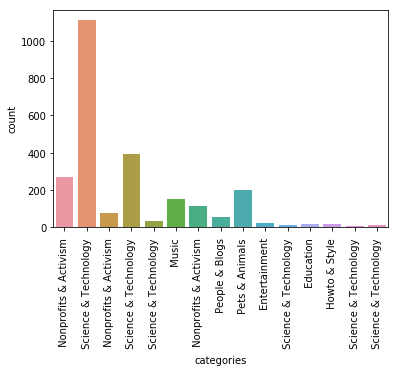

In [9]:
# TODO: Plot the frequencies in a histogram
p = sns.countplot(needed_columns['categories'])
p.set_xticklabels(labels = needed_columns['categories'].values, rotation=90)

## Encode and Balance the Data

As you can see above, the classes are very unbalanced, with the largest class (*Science & Technology*) having 1110 observations and the smallest (*Gaming*) having 9.  If this data were to be used to train a model, it would be biased towards predicting high frequency classes.  For example, if a model simply picked *Science & Technology* nomatter the input, the model would be correct 45% of the time.

In [10]:
needed_columns.groupby('categories').size().max() / len(needed_columns)

0.44542536115569825

### Class Weights

There are a number of ways to fix this in a dataset.  Some machine learning algorithms can take **weights for each class** that more heavily bloat training from less frequent classes, and train less from classes that have a larger frequency.

### Under-Sampling

Another solution is to randomly remove some of the observations (**under-sample**) from the large classes to make the frequency of observations more uniform.  This dataset, however, is rather small and contains classes that only have 9 observations.  

### Over-Sampling

A better solution would be to **over-sample**, where we create more instances of the less frequently occuring classes.  The [imblearn](https://imbalanced-learn.readthedocs.io/en/stable/over_sampling.html#random-over-sampler) has some over-sampling functions that we can use.  The one we are going to use is the Random Over Sampler.

[<br><center>
<img src="https://miro.medium.com/max/700/1*H6XodlitlGDl9YdbwaZLMw.png" href="https://towardsdatascience.com/handling-imbalanced-datasets-in-deep-learning-f48407a0e758">
  <p>You can find out more about how to handle imbalanced datasets <span href="https://towardsdatascience.com/handling-imbalanced-datasets-in-deep-learning-f48407a0e758">here</span></p>
 </center>](https://towardsdatascience.com/handling-imbalanced-datasets-in-deep-learning-f48407a0e758)

###TODO:
1. Encode the description data using the TFIDF scheme
2. Use the `RandomOverSampler` to balance all the classes

In [11]:
X = needed_columns['description']
y = needed_columns['categories']

X

0       http://www.ted.com When German psychologist In...
1       http://www.ted.com In the deep, dark ocean, ma...
2       http://www.ted.com Jacqueline Novogratz tells ...
3       http://www.ted.com Today's math curriculum is ...
4       http://www.ted.com Craig Venter and team make ...
5       http://www.ted.com Can opera be ever-so-slight...
6       http://www.ted.com The land of the free has be...
7       The hard choices -- what we most fear doing, a...
8       http://www.ted.com Bees are dying in droves. W...
9       http://www.ted.com Like your uncle at a family...
10      http://www.ted.com  Hacker and writer Joshua K...
11      http://www.ted.com Philip Zimbardo knows how e...
12      Here's a talk that could literally change your...
13      Dan Barasch and James Ramsey have a crazy plan...
14      http://www.ted.com The SETI Institute's Jill T...
15      http://www.ted.com How do you make a great pub...
16      SETI researcher Seth Shostak bets that we will...
17      http:/

In [13]:
# Create frequency vector using TFIDF scheme
vectorizer = CountVectorizer()
X_tfidf = vectorizer.fit_transform(X)

transformer = TfidfTransformer()
X_tfidf = transformer.fit_transform(X_tfidf)
X_tfidf.toarray()

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.11768429, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

We are using the random over sampler here from the imblearn library but there exists a [couple of other samplers](https://imbalanced-learn.readthedocs.io/en/stable/over_sampling.html#random-over-sampler) that could be tried.  If you have time, come back and try them out to see if they change the accuracy at all.

[Text(0, 0, ' Nonprofits & Activism '),
 Text(0, 0, ' Science & Technology '),
 Text(0, 0, ' Nonprofits & Activism '),
 Text(0, 0, ' Science & Technology '),
 Text(0, 0, ' Science & Technology '),
 Text(0, 0, ' Music '),
 Text(0, 0, ' Nonprofits & Activism '),
 Text(0, 0, ' People & Blogs '),
 Text(0, 0, ' Pets & Animals '),
 Text(0, 0, ' Entertainment '),
 Text(0, 0, ' Science & Technology '),
 Text(0, 0, ' Education '),
 Text(0, 0, ' Howto & Style '),
 Text(0, 0, ' Science & Technology '),
 Text(0, 0, ' Science & Technology ')]

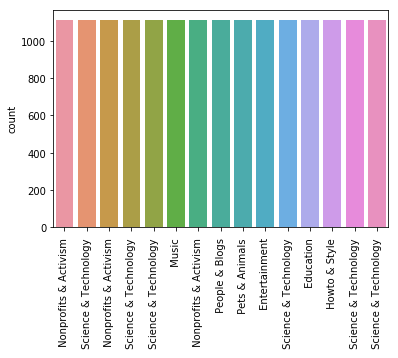

In [19]:
# Create over sampler object
sampler = RandomOverSampler()
X_resampled, y_resampled = sampler.fit_resample(X_tfidf, y)

# TODO: Display category frequencies in a histogram again 
# to see that they are uniform
p1= sns.countplot(y_resampled)
p1.set_xticklabels(labels = needed_columns['categories'].values, rotation=90)

## Define the Model
Now we are going to train a Logistic Regression model using our original, unsampled data.

###TODO:

- Split the data into training and validation data using `X_tfidf` and `y`
- Train a logistic regression model
- Predict and find the accuracy

In [26]:
# Split up the train and test data (e.g. train_test_split())
x_train, x_test, y_train, y_test = train_test_split(X_tfidf, y, test_size = 0.2)

# Fit the logistic regression model
clf = LogisticRegression(random_state=0)
clf.fit(x_train, y_train)

# Make predictions
prediction = clf.predict(x_test)

# Calculate the models accuracy and confusion matrix
print('Accuracy: \n%s' % metrics.accuracy_score(y_test, prediction))

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Accuracy: 
0.48296593186372744


## Use Over-Sampling

Aproximately 50% is not an amazing accuracy.  However, we know this is an accuracy gained when using the unsampled data.

***Hint***: Make note of this accuracy for one of the following challenges

### TODO
- Alter the above code/copy and edit it to use the balanced dataset
- Train and predict using the same model
- Does the accuracy increase at all?

In [27]:
# Redo above code using balanced dataset
# Split up the train and test data (e.g. train_test_split())
x_train, x_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size = 0.2)

# Fit the logistic regression model
clf = LogisticRegression(random_state=0)
clf.fit(x_train, y_train)

# Make predictions
prediction = clf.predict(x_test)

# Calculate the models accuracy and confusion matrix
print('Accuracy: \n%s' % metrics.accuracy_score(y_test, prediction))

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Accuracy: 
0.9603603603603603


## Challenge 2

The `RandomOverSampler` requires text data to be encoded before you can randomly over sample it.  Create your own OverSampler that can do this to the original data and run another train and test.

### TODO
- Create a new dataframe with classes over-sampled (Hint: you might find Pandas [sample()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.sample.html) useful)
- Encode the data
- Retrain the same Logistic Regression model
- Test the accuracy with and without the over-sampling

In [40]:
max_size = 2000
lst = []

for class_index, group in needed_columns.groupby('categories'):
  lst.append(group.sample(max_size-len(group), replace=True))
new_lst = pd.concat(lst)
# Encode the data
tfidf = TfidfVectorizer()
X_tfidf = tfidf.fit_transform(new_lst['title'])
y_data = new_lst['cat_id']
x_train, x_test, y_train, y_test = train_test_split(X_tfidf, y_data)
# Fit the logistic regression model
clf = LogisticRegression(random_state=0)
clf.fit(x_train, y_train)
# # Make predictions
predictions = clf.predict(x_test)
# # Calculate the models accuracy and confusion matrix
print("Confusion matrix:\n%s" % metrics.confusion_matrix(y_test, predictions))
print("\nAccuracy:\n%s" % metrics.accuracy_score(y_test, predictions))

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Confusion matrix:
[[416   0   0   3   0   0   2   0   5   0   0   0   0   0   0]
 [ 33  95   1  46   1  22   4   1  32   3   0   0   0   0   0]
 [  0   0 436   0   0   0   0   0   0   0   0   0   0   0   0]
 [  8   0   4 388   0   4   1   1  13   0   0   0   0   0   0]
 [  0   0   0   0 503   0   0   0   0   0   0   0   0   0   0]
 [  0   0   2   0   0 452   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0 475   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0 467   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0 452   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0 521   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0 514   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0 527   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0 507   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0 459   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 479]]

Accuracy:
0.9729533226697687


## Challenge 3

Above we encoded 100% of the data, and then...
1. trained a Logistic Regression model
2. over-sampled that data and trained a Logistic Regression model

What impact might fitting our encoder to only the 80% training data instead of all 100% have? I.E. doing a train test split first and then fitting the encoder to the training data and only transforming it and the test data. Does this impact the number of features in each frequency vector? And does this impact the accuracy of a Logistic Regression model?

###TODO
- Train and Test split on the `description` and `categories` columns
- Encode only the 80% training data using the TFIDF scheme
- Train a Logistic Regression model the same as before
- Predict against a TFIDF transformed test data
- Is the accuracy better or worse than before?

In [49]:
# Train test split
x_train, x_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size = 0.2)

# Encode training data
tfidf = TfidfVectorizer()
X_train_tfidf = tfidf.fit_transform(x_train)
X_test_tfidf = tfidf.transform(x_test)  #Have already done the fit on the training data so only need to do a transform now 

# Train the Logistic Regression mode
clf.fit(X_tfidf, y_train)

# Make predictions
prediction = clf.predict(X_test_tfidf)

# Calculate the models accuracy and confusion matrix
print('Accuracy: \n%s' % metrics.accuracy_score(y_test, prediction))



AttributeError: ignored

## Stretch Challenge

We have been repeating ourself quite alot through this notebook.  Can you tidy it up be tidying repeated code into functions?